In [23]:
%matplotlib inline
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly
import gc
import matplotlib.pyplot as plt
import os

import matplotlib as mpl
from sklearn.manifold import MDS

### file load

In [4]:
data=pd.read_csv('stack/survey_results_public.csv',low_memory=False)

### Data preprocessing

In [5]:
jobs=set()
jobs=list(set([job for i in data.DevType.dropna() for job in i.split(';')]))

In [6]:
LanguageWorkedWith=[]
for num,i in enumerate(data['LanguageWorkedWith']):        
    if not pd.isnull(i):
        
        if len(i.split(';'))>1:        
            for j in i.split(';'):            
                LanguageWorkedWith.append(j)
                LanguageWorkedWith=list(set(LanguageWorkedWith))
        else:        
            LanguageWorkedWith.append(i)
            LanguageWorkedWith=list(set(LanguageWorkedWith))

In [9]:
## tabular table creation
job_lan=pd.DataFrame(0,columns=LanguageWorkedWith,index=jobs)

In [19]:
## filing table
data_=data[~pd.isnull(data['DevType'])]
data_=data_[~pd.isnull(data_['LanguageWorkedWith'])]

# job list iteration
for jobname in jobs:    
    print(jobname,'complete')
    # Devtype column iteration
    for rownum,jobdata in enumerate(data_['DevType']):
        # jobname iteration        
        if jobname in jobdata:             
            #language iteration
            for lan in LanguageWorkedWith:                
                if not pd.isnull(data_['LanguageWorkedWith'].iloc[rownum]):
                    if lan in data_['LanguageWorkedWith'].iloc[rownum]:
                        job_lan[lan][jobname]+=1

Designer complete
Database administrator complete
Data or business analyst complete
Marketing or sales professional complete
Product manager complete
Student complete
C-suite executive (CEO, CTO, etc.) complete
Game or graphics developer complete
Front-end developer complete
Full-stack developer complete
Back-end developer complete
System administrator complete
DevOps specialist complete
Embedded applications or devices developer complete
QA or test developer complete
Mobile developer complete
Educator or academic researcher complete
Data scientist or machine learning specialist complete
Engineering manager complete
Desktop or enterprise applications developer complete


## Programming language ranking by data sceintist or machine learning engineer

Text(0, 0.5, 'percentage (%)')

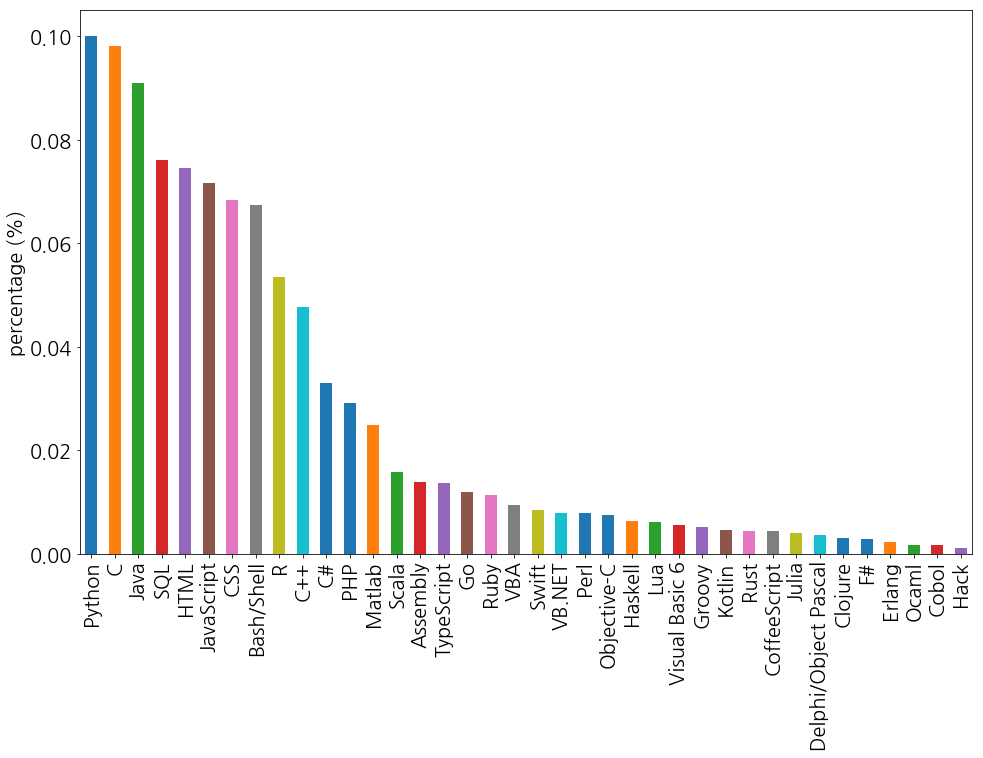

In [21]:
norm_data_scientist=job_lan.loc['Data scientist or machine learning specialist']/sum(job_lan.loc['Data scientist or machine learning specialist'])

plt1=norm_data_scientist.sort_values(ascending=False).plot(kind='bar',\
figsize=(16,10),fontsize=20)

plt1.set_ylabel('percentage (%)',fontsize=20)


## MDS plot on 2-D space

In [26]:
row_norm=job_lan.apply(lambda row: np.linalg.norm(row), axis=1)
norm_row_job_lan=job_lan.div(row_norm,axis=0)

In [29]:
job_lan

,CSS,Erlang,VBA,Haskell,F#,Kotlin,SQL,Scala,Bash/Shell,Assembly,...,Perl,Lua,Cobol,R,VB.NET,Julia,Hack,TypeScript,Java,Rust
Designer,8070,102,766,219,138,364,6334,224,3750,953,...,487,469,139,1317,1210,64,70,1784,8738,188
Database administrator,8924,205,1117,285,215,403,9374,379,5434,943,...,778,573,146,1961,1465,74,84,2048,9823,290
Data or business analyst,4144,83,1016,177,135,172,4937,353,2716,492,...,406,236,136,1795,815,87,60,863,4868,122
Marketing or sales professional,731,32,97,36,34,45,579,38,358,98,...,70,77,32,185,109,28,35,151,766,34
Product manager,2739,96,316,104,81,189,2533,155,1769,310,...,250,202,60,751,372,37,47,733,3173,99
Student,8312,151,562,705,152,622,6223,415,4758,2006,...,357,646,88,2207,810,148,62,1341,10193,481
"C-suite executive (CEO, CTO, etc.)",2214,104,206,92,78,163,1991,152,1474,331,...,196,177,65,649,259,39,46,652,2549,106
Game or graphics developer,2627,65,223,170,73,223,1835,121,1585,597,...,181,472,43,644,323,39,38,575,3208,212
Front-end developer,25308,307,1549,654,405,1088,18411,822,11494,1842,...,1075,1017,228,4375,2574,100,103,8052,27448,620
Full-stack developer,31161,521,1789,913,651,1523,25818,1594,16568,2204,...,1582,1334,278,6594,3109,132,129,10207,35377,919


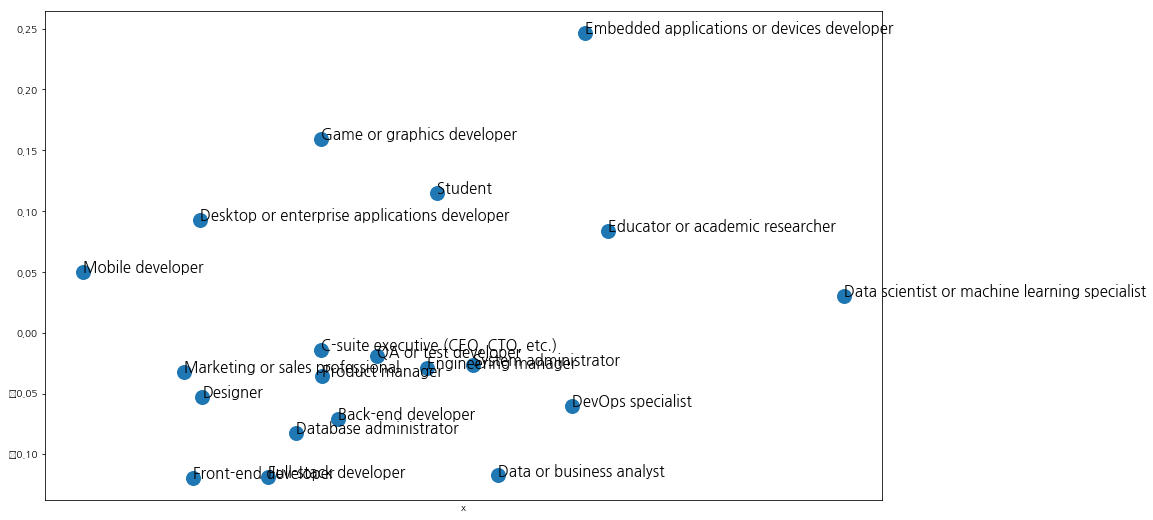

In [31]:
mds = MDS(n_components=2, random_state=0)
pos = mds.fit_transform(norm_row_job_lan)
xs, ys = pos[:, 0], pos[:, 1]
df = pd.DataFrame(dict(x=xs, y=ys, title=job_lan.index.values)) 

# set up plot
fig, ax = plt.subplots(figsize=(15, 9))

ax.margins(0.05)

df.plot(x='x',y='y',marker='o', ms=15, mec='none',ax=ax, linestyle='',legend=False)
ax.set_aspect('auto')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

for i in range(len(df)):
    ax.text(df.iloc[i]['x'], df.iloc[i]['y'], df.iloc[i]['title'], size=15)  